# Foreign Exchange Rate Prediction using LSTM Recurrent Neural Network

In [53]:
#Importing Linraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import math
import yfinance as yf
import numpy as np
import pandas as pd
import pywt
from pywt import wavedec
from pywt import waverec
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [99]:
#Reading dataset
data_set = pd.read_csv('sample_data/Foreign_Exchange_Rates.csv', na_values='ND')
data_set_plot = pd.read_csv('sample_data/Foreign_Exchange_Rates.csv', na_values='ND')

In [55]:
data_set.shape

(5217, 24)

In [56]:
#Dataset head
data_set.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [105]:
#Checking null values
data_set.isnull().sum()

Unnamed: 0                                   0
Time Serie                                   0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            0
EURO AREA - EURO/US$                         0
NEW ZEALAND - NEW ZELAND DOLLAR/US$          0
UNITED KINGDOM - UNITED KINGDOM POUND/US$    0
BRAZIL - REAL/US$                            0
CANADA - CANADIAN DOLLAR/US$                 0
CHINA - YUAN/US$                             0
HONG KONG - HONG KONG DOLLAR/US$             0
INDIA - INDIAN RUPEE/US$                     0
KOREA - WON/US$                              0
MEXICO - MEXICAN PESO/US$                    0
SOUTH AFRICA - RAND/US$                      0
SINGAPORE - SINGAPORE DOLLAR/US$             0
DENMARK - DANISH KRONE/US$                   0
JAPAN - YEN/US$                              0
MALAYSIA - RINGGIT/US$                       0
NORWAY - NORWEGIAN KRONE/US$                 0
SWEDEN - KRONA/US$                           0
SRI LANKA - SRI LANKAN RUPEE/US$             0
SWITZERLAND -

In [106]:
data_set.interpolate(inplace=True)
data_set.isnull().sum()

Unnamed: 0                                   0
Time Serie                                   0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            0
EURO AREA - EURO/US$                         0
NEW ZEALAND - NEW ZELAND DOLLAR/US$          0
UNITED KINGDOM - UNITED KINGDOM POUND/US$    0
BRAZIL - REAL/US$                            0
CANADA - CANADIAN DOLLAR/US$                 0
CHINA - YUAN/US$                             0
HONG KONG - HONG KONG DOLLAR/US$             0
INDIA - INDIAN RUPEE/US$                     0
KOREA - WON/US$                              0
MEXICO - MEXICAN PESO/US$                    0
SOUTH AFRICA - RAND/US$                      0
SINGAPORE - SINGAPORE DOLLAR/US$             0
DENMARK - DANISH KRONE/US$                   0
JAPAN - YEN/US$                              0
MALAYSIA - RINGGIT/US$                       0
NORWAY - NORWEGIAN KRONE/US$                 0
SWEDEN - KRONA/US$                           0
SRI LANKA - SRI LANKAN RUPEE/US$             0
SWITZERLAND -

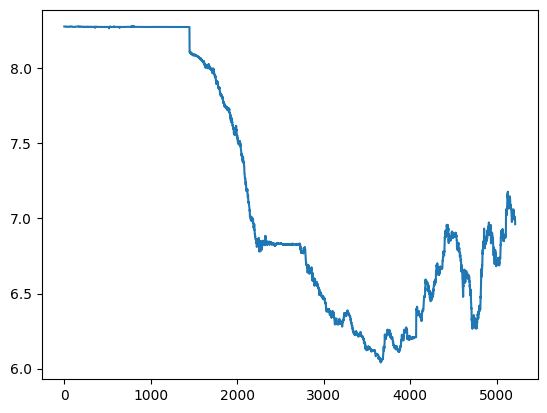

In [59]:
#Plotting China Exchange rate
plt.plot(data_set['CHINA - YUAN/US$'])

In [60]:
#Data frame
df = data_set['CHINA - YUAN/US$']

In [61]:
print(df)

0       8.27980
1       8.27990
2       8.27980
3       8.27970
4       8.27940
         ...   
5212    7.00065
5213    6.99490
5214    6.99540
5215    6.98640
5216    6.96180
Name: CHINA - YUAN/US$, Length: 5217, dtype: float64


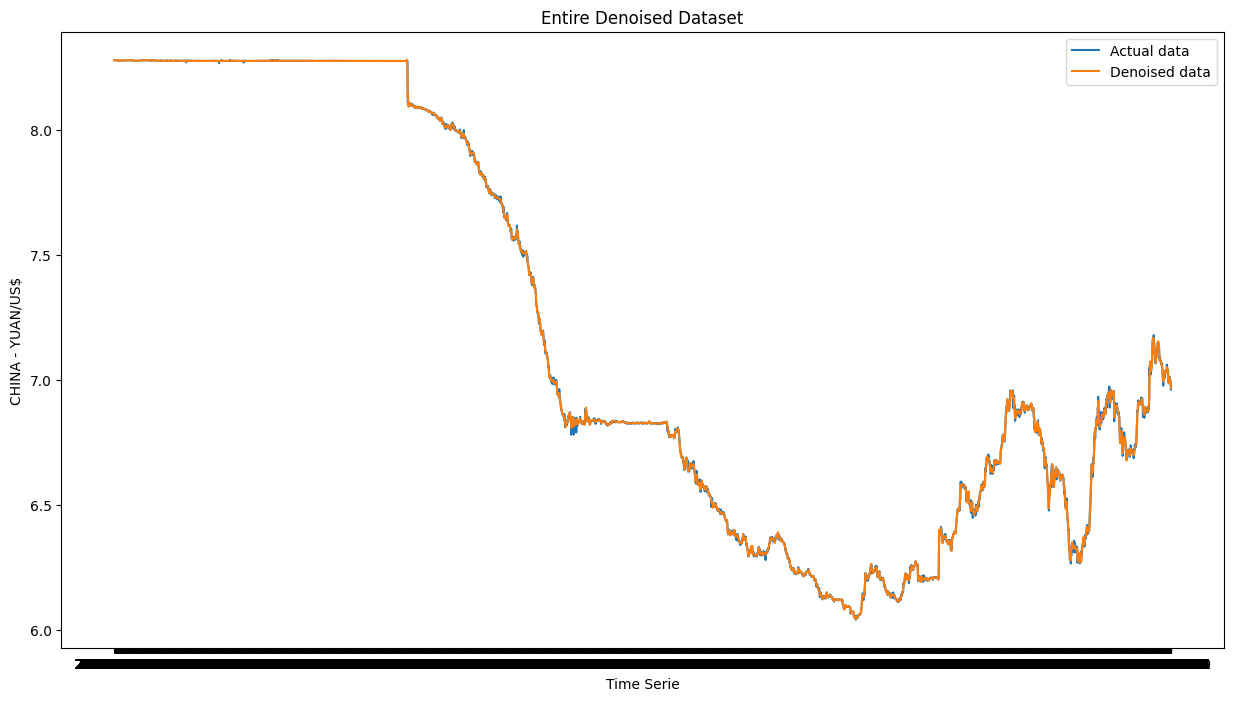

In [62]:
def denoise_preprocess(fx_data):

#taking closing price data
    combined_data = fx_data['Time Serie'] + fx_data['CHINA - YUAN/US$'].astype(str)

    # Create a new DataFrame from the combined_data Series
    formatted_df = pd.DataFrame(combined_data)

    # Split the combined data into two separate columns 'Date' and 'Price'
    formatted_df[['Date', 'Price']] = formatted_df[0].str.extract(r'(\d{4}-\d{2}-\d{2})(.*)')

    # Convert 'Date' to datetime and 'Price' to a numeric type (float)
    formatted_df['Date'] = pd.to_datetime(formatted_df['Date'])
    formatted_df['Price'] = pd.to_numeric(formatted_df['Price'], errors='coerce')  # 'coerce' will set 'nan' strings to NaN

    # Set 'Date' as the index of the DataFrame
    formatted_df.set_index('Date', inplace=True)

    return formatted_df['Price']

def wavelet_denoise(train):
        #initiate wavelet type and wavelet decomposition level variables
    level = 2 #wavelet transform decomposition level
    wavelet = 'db2' #wavelet type. here we choose wavelet Daubechies 2 (db2)
    #making function for calculating mean absolute deviation for thresholding
    def mad(d, axis=None):
        """ Mean absolute deviation of a signal """
        return np.mean(np.absolute(d - np.mean(d, axis)), axis)

    #decompositon/Discrete Wavelet Transform
    level = int(level)
    wavelet = wavelet
    coeff = wavedec(train, wavelet, level=level)
    level, wavelet, coeff
    #thresholding
    sigma = mad(coeff[-level])/0.6745
    threshold = sigma * np.sqrt(2*np.log(len(train)))
    coeff[1:] = (pywt.threshold(i, value=threshold, mode="soft") for i in coeff[1:])
    #reconstruction/Inverse Discrete Wavelet Transform
    denoised = waverec(coeff, wavelet)
    train = train.reset_index()
    if len(train)!=len(denoised):
        denoised = denoised[:-1]
    train ['denoised'] = denoised
    return train

def plot_before_after_denoise(original, denoised):
    #plotting the actual stock price data and the denoised data
    plt.figure(figsize=(15, 8))
    plt.title('Entire Denoised Dataset')
    plt.plot(original['Time Serie'], original['CHINA - YUAN/US$'])
    plt.plot(original['Time Serie'], denoised)
    plt.xlabel('Time Serie')
    plt.ylabel('CHINA - YUAN/US$')
    plt.legend(['Actual data', 'Denoised data'], loc='best')
denoised = wavelet_denoise(denoise_preprocess(data_set))
plot_before_after_denoise(data_set, denoised['denoised'])

In [63]:
#Preprocessing data set
df = np.array(df).reshape(-1,1)

In [64]:
df

array([[8.2798],
       [8.2799],
       [8.2798],
       ...,
       [6.9954],
       [6.9864],
       [6.9618]])

In [65]:
df_dn = np.array(denoised['denoised']).reshape(-1,1)
df_dn

array([[8.27987303],
       [8.27988211],
       [8.27970281],
       ...,
       [6.9869119 ],
       [6.97561534],
       [6.96808731]])

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_dn = MinMaxScaler()

In [67]:
df = scaler.fit_transform(df)
df_dn = scaler_dn.fit_transform(df_dn)

In [68]:
df

array([[0.99991071],
       [0.99995535],
       [0.99991071],
       ...,
       [0.42646665],
       [0.42244843],
       [0.41146531]])

In [69]:
df_dn

array([[0.99924145],
       [0.99924551],
       [0.99916539],
       ...,
       [0.42148125],
       [0.41643337],
       [0.41306947]])

In [70]:
#Training and test sets
train = df[:4800]
test = df[4800:]
train_dn = df_dn[:4800]
test_dn = df_dn[4800:]

print(train.shape)
print(test.shape)
print(train_dn.shape)
print(test_dn.shape)

(4800, 1)
(417, 1)
(4800, 1)
(417, 1)


In [71]:
def get_data(data, look_back):
  datax, datay = [],[]
  for i in range(len(data)-look_back-1):
    datax.append(data[i:(i+look_back),0])
    datay.append(data[i+look_back,0])
  return np.array(datax) , np.array(datay)

In [72]:
look_back = 1

x_train , y_train = get_data(train, look_back)
x_train_dn , y_train_dn = get_data(train_dn, look_back)
print(x_train.shape)
print(y_train.shape)
print(x_train_dn.shape)
print(y_train_dn.shape)

(4798, 1)
(4798,)
(4798, 1)
(4798,)


In [73]:
x_test , y_test = get_data(test,look_back)
x_test_dn , y_test_dn = get_data(test_dn,look_back)
print(x_test.shape)
print(y_test.shape)
print(x_test_dn.shape)
print(y_test_dn.shape)

(415, 1)
(415,)
(415, 1)
(415,)


In [74]:
#Processing train and test sets for LSTM model
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)
x_train_dn = x_train_dn.reshape(x_train_dn.shape[0],x_train_dn.shape[1], 1)
x_test_dn = x_test_dn.reshape(x_test_dn.shape[0],x_test_dn.shape[1], 1)

In [75]:
print(x_train.shape)
print(x_test.shape)
print(x_train_dn.shape)
print(x_test_dn.shape)

(4798, 1, 1)
(415, 1, 1)
(4798, 1, 1)
(415, 1, 1)


In [76]:
#Defining the LSTM model
from keras.models import Sequential
from keras.layers import Dense,LSTM


In [77]:
n_features = x_train.shape[1]
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(1,1)))
model.add(Dense(n_features))
n_features_dn = x_train_dn.shape[1]
model_dn = Sequential()
model_dn.add(LSTM(100,activation='relu',input_shape=(1,1)))
model_dn.add(Dense(n_features_dn))

In [78]:
model.summary()
model_dn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               40800     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                            

In [79]:
#Compiling
model.compile(optimizer='adam', loss = 'mse')
model_dn.compile(optimizer='adam', loss = 'mse')

In [80]:
#Training
model.fit(x_train,y_train, epochs = 5, batch_size=1)
model_dn.fit(x_train_dn,y_train_dn, epochs = 5, batch_size=1)

Epoch 1/5
4798/4798 [==============================] - 14s 3ms/step - loss: 0.0088
Epoch 2/5
4798/4798 [==============================] - 13s 3ms/step - loss: 3.5788e-05
Epoch 3/5
4798/4798 [==============================] - 13s 3ms/step - loss: 2.6804e-05
Epoch 4/5
4798/4798 [==============================] - 12s 3ms/step - loss: 2.5319e-05
Epoch 5/5
4798/4798 [==============================] - 13s 3ms/step - loss: 2.5257e-05
Epoch 1/5
4798/4798 [==============================] - 14s 3ms/step - loss: 0.0088
Epoch 2/5
4798/4798 [==============================] - 13s 3ms/step - loss: 3.2901e-05
Epoch 3/5
4798/4798 [==============================] - 13s 3ms/step - loss: 1.1581e-05
Epoch 4/5
4798/4798 [==============================] - 13s 3ms/step - loss: 1.4634e-05
Epoch 5/5
4798/4798 [==============================] - 12s 3ms/step - loss: 1.1633e-05


In [81]:
#Prediction using the trained model
scaler.scale_
scaler_dn.scale_

array([0.44685041])

In [82]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred[:10])
y_pred_dn = model_dn.predict(x_test_dn)
y_pred_dn = scaler_dn.inverse_transform(y_pred_dn)
print(y_pred_dn[:10])

13/13 [==============================] - 0s 2ms/step
[[6.3992424]
 [6.4122133]
 [6.413516 ]
 [6.405603 ]
 [6.4140162]
 [6.4009957]
 [6.400194 ]
 [6.380964 ]
 [6.3849697]
 [6.399092 ]]
13/13 [==============================] - 0s 2ms/step
[[6.404758 ]
 [6.4117355]
 [6.408735 ]
 [6.408408 ]
 [6.4107547]
 [6.4123845]
 [6.404208 ]
 [6.398659 ]
 [6.3957376]
 [6.3921123]]


In [83]:
#Processing test shape
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test)
print(y_test[:10])
y_test_dn = np.array(y_test_dn).reshape(-1,1)
y_test_dn = scaler_dn.inverse_transform(y_test_dn)
print(y_test_dn[:10])

[[6.4162]
 [6.4175]
 [6.4096]
 [6.418 ]
 [6.405 ]
 [6.4042]
 [6.385 ]
 [6.389 ]
 [6.4031]
 [6.4   ]]
[[6.41120069]
 [6.40819622]
 [6.40786881]
 [6.41021848]
 [6.41185083]
 [6.40366317]
 [6.39810678]
 [6.39518164]
 [6.39155147]
 [6.39633046]]


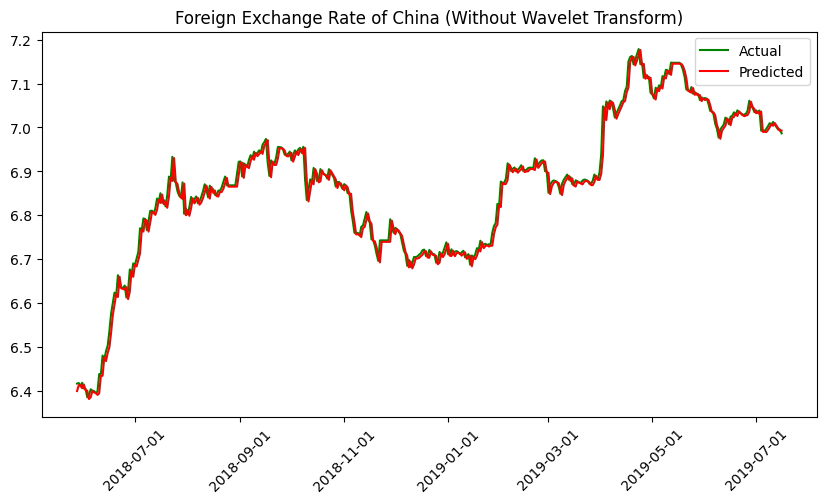

In [107]:
#Visualizing the results
date_range = pd.date_range(start=data_set_plot['Time Serie'][4800], periods=len(y_test), freq='D')

plt.figure(figsize=(10, 5))
plt.title('Foreign Exchange Rate of China (Without Wavelet Transform)')
plt.plot(date_range, y_test, label='Actual', color='g')
plt.plot(date_range, y_pred, label='Predicted', color='r')

# Rotate the dates on x-axis for better visibility
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.legend()
plt.show()

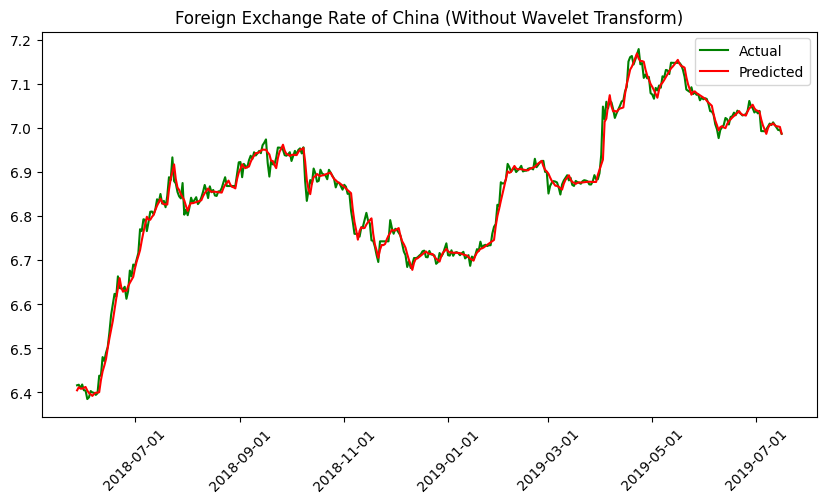

In [108]:
#Visualizing the results
date_range = pd.date_range(start=data_set_plot['Time Serie'][4800], periods=len(y_test), freq='D')

plt.figure(figsize=(10, 5))
plt.title('Foreign Exchange Rate of China (Without Wavelet Transform)')
plt.plot(date_range, y_test, label='Actual', color='g')
plt.plot(date_range, y_pred_dn, label='Predicted', color='r')

# Rotate the dates on x-axis for better visibility
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.legend()
plt.show()

In [94]:
from sklearn.metrics import mean_squared_error
print("MSE for LSTM without Wavelet Transform:")
mean_squared_error(y_test, y_pred)


MSE for LSTM without Wavelet Transform:


0.0003530398104427771

In [95]:
print("MSE for LSTM with Wavelet Transform:")
mean_squared_error(y_test, y_pred_dn)

MSE for LSTM with Wavelet Transform:


0.00022814305427729196